# HOUSE PRICE PREDICTION

## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Importing the Dataset

In [1]:
data1 = pd.read_csv("train.csv")
data2 = pd.read_csv("test.csv")
data = pd.concat([data1, data2], axis=0)

## Exploratory Data Analysis

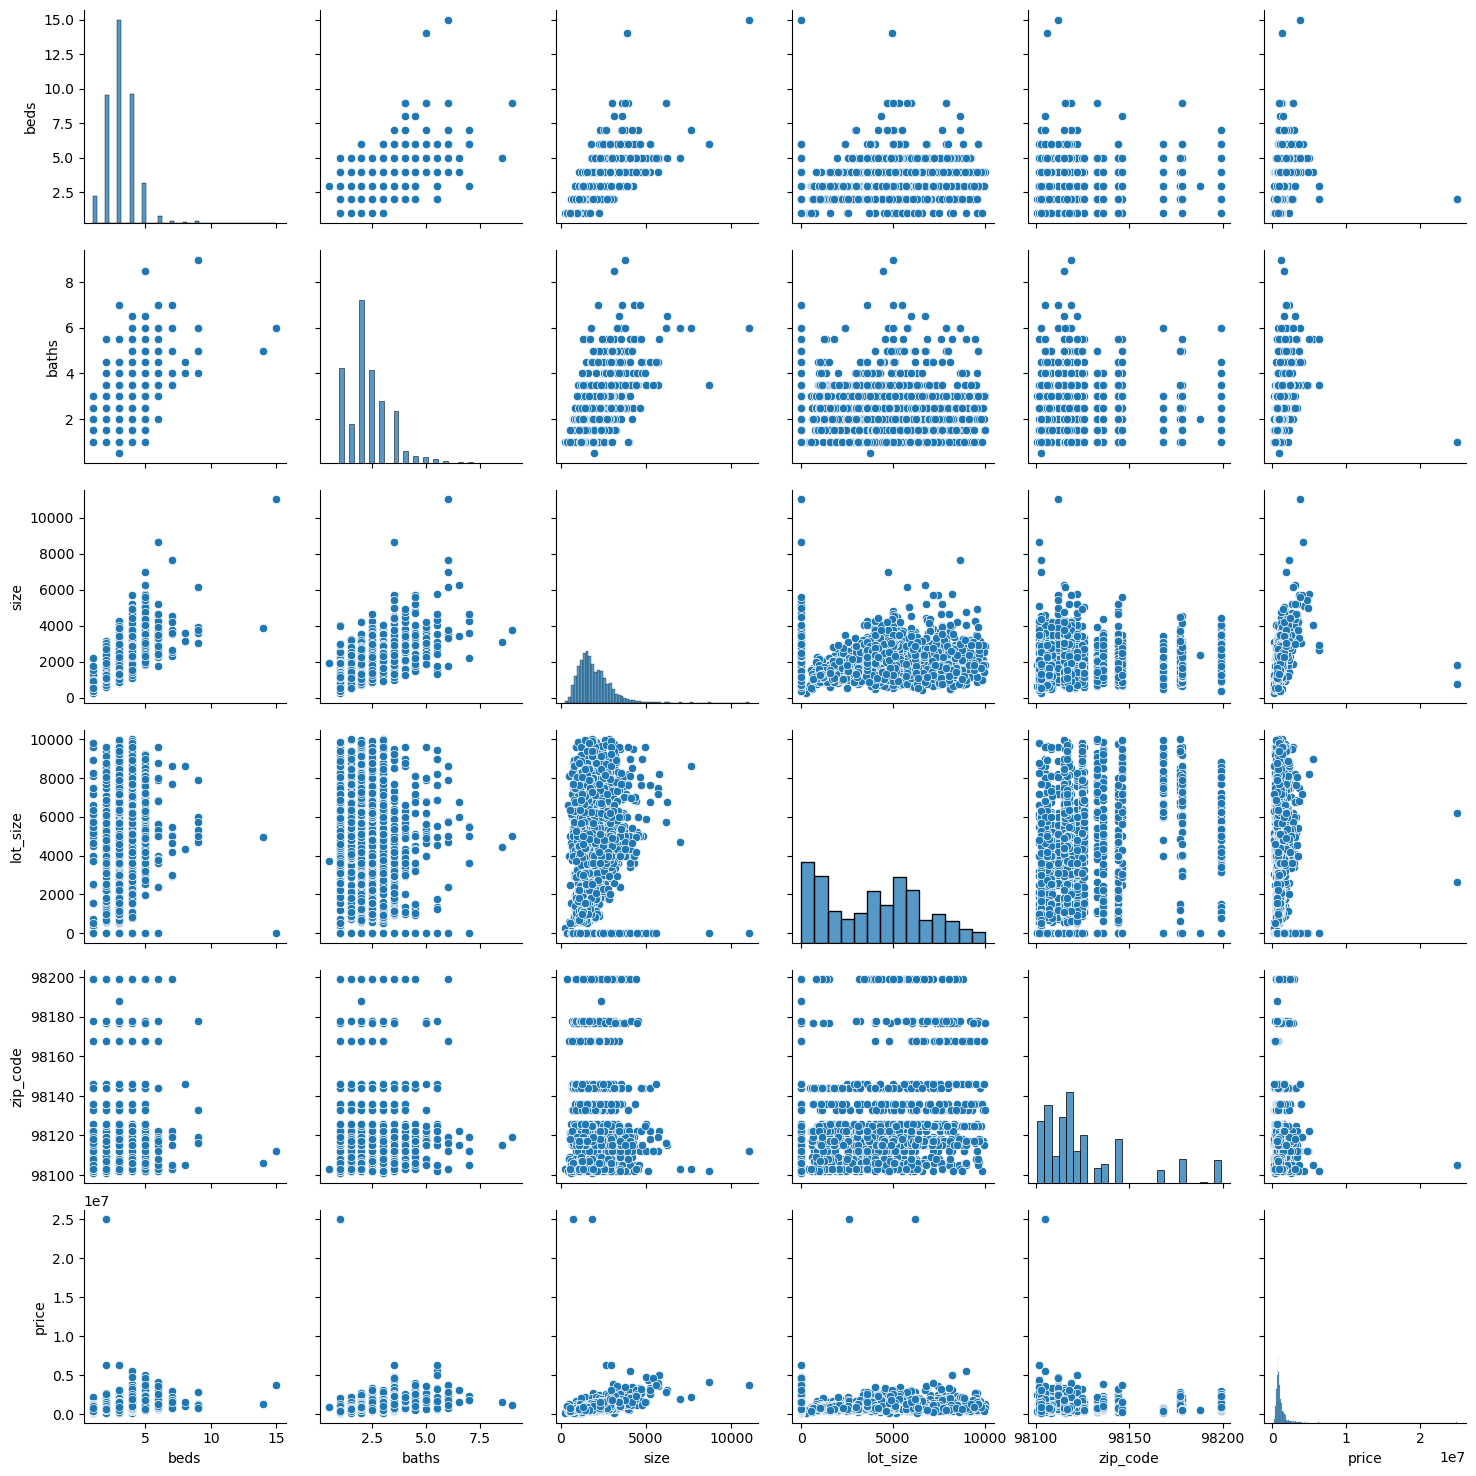

In [14]:
sns.pairplot(data)

C:\Users\rousa\AppData\Local\Temp\ipykernel_7744\2309002448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

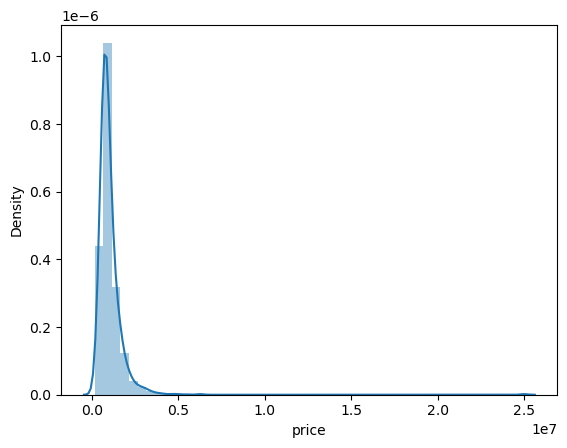

In [15]:
sns.distplot(data['price'])

C:\Users\rousa\AppData\Local\Temp\ipykernel_7744\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

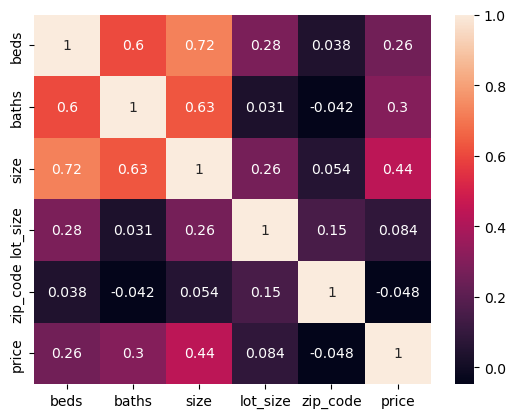

In [16]:
sns.heatmap(data.corr(),annot=True)

## Training a Linear Regression Model

In [44]:
X = data[["beds","baths","size","lot_size","zip_code"]]
y = data['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
print(model.intercept_)

293246686.53028


## Predictions from our Model

In [25]:
predictions = model.predict(X_test)

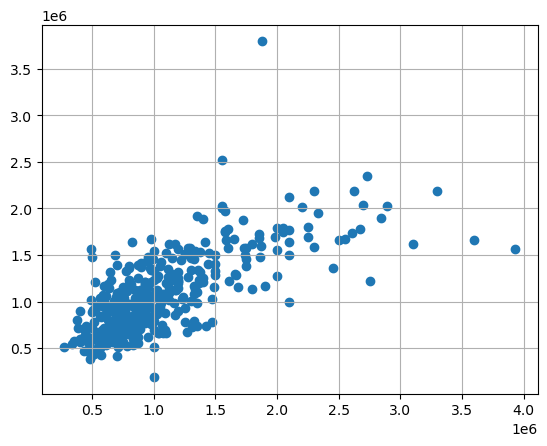

In [27]:
plt.scatter(y_test,predictions)
plt.grid(True)

C:\Users\rousa\AppData\Local\Temp\ipykernel_7744\1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='price', ylabel='Density'>

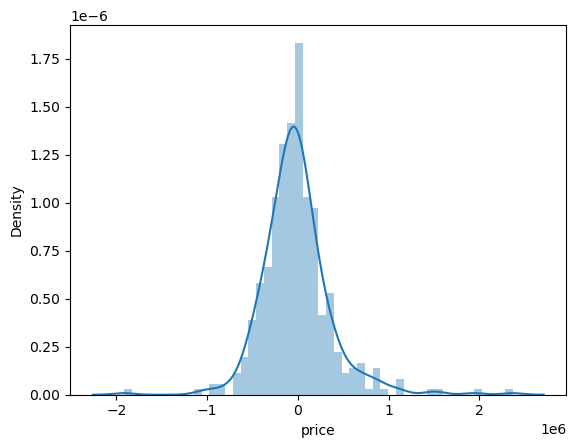

In [28]:
sns.distplot((y_test-predictions),bins=50)

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))           
print('MSE:', metrics.mean_squared_error(y_test, predictions))             
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))  
print('R-squared:', metrics.r2_score(y_test, predictions))                

MAE: 259626.30419068108
MSE: 145721709126.4392
RMSE: 381735.1295419891
R-squared: 0.4984668089043268


In [48]:
beds = float(input("Enter the beds:"))
baths= float(input("Enter the baths:"))
size= float(input("Enter the size:"))
lot_size = float(input("Enter the lot_size:"))
zip_code = float(input("Enter the zip_code:"))

new = np.array([[beds,baths,size,lot_size,zip_code]])

new_input = model.predict(new)

print('The price of the house is :', new_input)               

Enter the beds:3
Enter the baths:2
Enter the size:24567
Enter the lot_size:23568
Enter the zip_code:97584
The price of the house is : [14644779.02579379]


D:\yahiya\anoconda\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
